In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import (LinearRegression, Ridge, Lasso,LogisticRegression)
from sklearn.model_selection import (KFold, cross_val_score)

In [2]:
df_train_ori = pd.read_csv('./Admission_Predict.csv')
# Dropping a few columns.  Waterfront and view are binary. 
df_train_ori = df_train_ori.drop(['Serial No.'],axis=1)

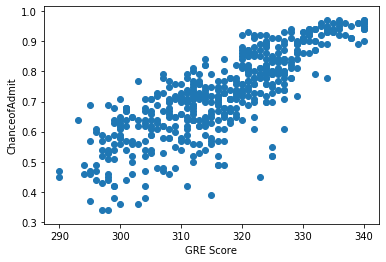

In [3]:
#In this project, as we are predicting the SalePrice of a property, it is a common sense that there should be a linear relationsip
#between the area of the property and the sale price of the property. (The area of the property is in cloumn 'GrLivArea')

#We will use scatter plot to see if the relationship is linear. 
plt.scatter(x = df_train_ori['GRE Score'], y = df_train_ori['ChanceofAdmit'])
plt.ylabel('ChanceofAdmit')
plt.xlabel('GRE Score')
plt.show()

In [4]:
df_train_drop = df_train_ori.drop('ChanceofAdmit',1)
X = df_train_drop.values
y = df_train_ori.ChanceofAdmit.values
colnames = df_train_drop.columns
kf = KFold(n_splits=5)
#kf.get_n_splits(X)
print(kf)
clf = Lasso(alpha=0.006)
scores=cross_val_score(clf,X,y,cv=kf)
print(scores)
clf = LinearRegression()
scores=cross_val_score(clf,X,y,cv=kf)
print(scores)
print(colnames[0])

KFold(n_splits=5, random_state=None, shuffle=False)
[0.61750709 0.79033078 0.84694209 0.80453715 0.8690573 ]
[0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]
GRE Score


# Feature Selection (Normalize = False)

### The objective of Lasso is
`(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1`

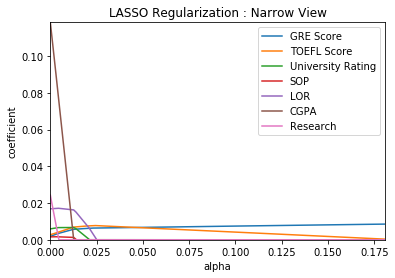

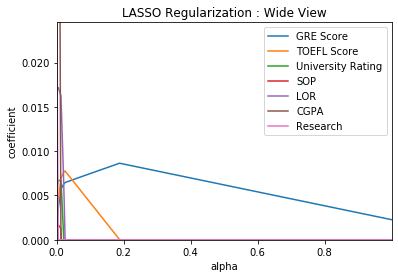

Maximum alpha where GRE Score  coefficient is nonzero :  [0.9999]
Maximum alpha where TOEFL Score  coefficient is nonzero :  [0.1883]
Maximum alpha where University Rating  coefficient is nonzero :  [0.0212]
Maximum alpha where SOP  coefficient is nonzero :  [0.0141]
Maximum alpha where LOR  coefficient is nonzero :  [0.025]
Maximum alpha where CGPA  coefficient is nonzero :  [0.0126]
Maximum alpha where Research  coefficient is nonzero :  [0.0046]


In [44]:
lassoCoefArr = np.ndarray(shape=(df_train_drop.shape[1],10000), dtype=float)
alphaArr = np.array([])
alphaIter = 0.9999
firstNonZeroIndex = 0
lastIndex=0
featureArr = np.zeros((df_train_drop.shape[1],1))
while(alphaIter>0):
    # create a lasso regressor
    lasso = Lasso(alpha=alphaIter)

    # Fit the regressor to the data
    lasso.fit(X,y)

    alphaArr = np.concatenate((alphaArr, np.array([alphaIter])), axis=0)
    
    for i in range(df_train_drop.shape[1]):
        lassoCoefArr[i][lastIndex]=lasso.coef_[i]
    
    numberOfNonZeroCoef=0
    for index in range(df_train_drop.shape[1]):
        if lasso.coef_[index]>0:
            numberOfNonZeroCoef +=1
            if featureArr[index] < alphaIter:
                featureArr[index]=alphaIter
    
    #if numberOfNonZeroCoef==7:
        #break
        
    alphaIter -= 0.0001
    round(alphaIter,5)
    if numberOfNonZeroCoef==0:
        firstNonZeroIndex += 1
    lastIndex +=1

if(firstNonZeroIndex>10):
    firstNonZeroIndex -= 10

plt.title('LASSO Regularization : Narrow View')
plt.xlabel('alpha')
plt.ylabel('coefficient')
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','b', 'g', 'r', 'c', 'm', 'y', 'k']
for x in range(df_train_drop.shape[1]):
    plt.plot(alphaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
plt.xlim(0,np.mean(featureArr))
plt.show()

plt.title('LASSO Regularization : Wide View')
plt.xlabel('alpha')
plt.ylabel('coefficient')

for x in range(df_train_drop.shape[1]):
    plt.plot(alphaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
#plt.xlim(0,np.mean(featureArr))
plt.ylim(0,np.mean(lasso.coef_))
plt.show()

for x in range(df_train_drop.shape[1]):
    print('Maximum alpha where',colnames[x],' coefficient is nonzero : ',featureArr[x])

# Question
- alpha 값에 따른 feature들의 값과, 처음으로 각 feature가 nonzero가 되는 alpha 값이 의미가 있는가?
- 처음으로 feature가 nonzero가 되는 alpha 값이 크다면 Linear Regression으로 풀 때도 더 의미가 있는(= 영향력이 큰, 계수가 큰) 지표라고 볼 수 있는가?
- 처음으로 feature가 nonzero가 되는 alpha 값이 0.9999면..?

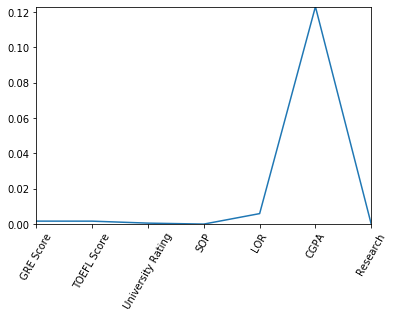

In [18]:
lasso = Lasso(alpha=0.001, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Plot the coefficients

plt.plot(range(len(colnames)), lasso.coef_)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.0001)
plt.show()

In [8]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]
Average 5-Fold CV Score: 0.8108015220863887


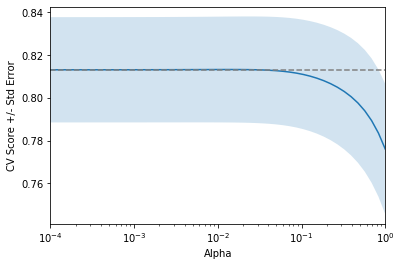

In [9]:
from sklearn.linear_model import Ridge

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

float64
(0,) [0.]
(1,) [0.]
(2,) [0.]
(3,) [0.]
(4,) [0.]
(5,) [0.]
(6,) [0.]
(7,) [0.]
(8,) [0.]
(9,) [0.]
(10,) [0.]
(11,) [0.]
(12,) [0.]
(13,) [0.]
(14,) [0.]
(15,) [0.]
(16,) [0.]
(17,) [0.]
(18,) [0.]
(19,) [0.]
(20,) [0.]
(21,) [0.]
(22,) [0.]
(23,) [0.]
(24,) [0.]
(25,) [0.]
(26,) [0.]
(27,) [0.]
(28,) [0.]
(29,) [0.]
(30,) [0.]
(31,) [0.]
(32,) [0.]
(33,) [0.]
(34,) [0.]
(35,) [0.]
(36,) [0.]
(37,) [0.]
(38,) [0.]
(39,) [0.]
(40,) [0.]
(41,) [0.]
(42,) [0.]
(43,) [0.]
(44,) [0.]
(45,) [0.]
(46,) [0.]
(47,) [0.]
(48,) [0.]
(49,) [0.]
(50,) [0.]
(51,) [0.]
(52,) [0.]
(53,) [0.]
(54,) [0.]
(55,) [0.]
(56,) [0.]
(57,) [0.]
(58,) [0.]
(59,) [0.]
(60,) [0.]
(61,) [0.]
(62,) [0.]
(63,) [0.]
(64,) [0.]
(65,) [0.]
(66,) [0.]
(67,) [0.]
(68,) [0.]
(69,) [0.]
(70,) [0.]
(71,) [0.]
(72,) [0.]
(73,) [0.]
(74,) [0.]
(75,) [0.]
(76,) [0.]
(77,) [0.]
(78,) [0.]
(79,) [0.]
(80,) [0.]
(81,) [0.]
(82,) [0.]
(83,) [0.]
(84,) [0.]
(85,) [0.]
(86,) [0.]
(87,) [0.]
(88,) [0.]
(89,) [0.]
(90,) [0.]
(

(744,) [0.]
(745,) [0.]
(746,) [0.]
(747,) [0.]
(748,) [0.]
(749,) [0.]
(750,) [0.]
(751,) [0.]
(752,) [0.]
(753,) [0.]
(754,) [0.]
(755,) [0.]
(756,) [0.]
(757,) [0.]
(758,) [0.]
(759,) [0.]
(760,) [0.]
(761,) [0.]
(762,) [0.]
(763,) [0.]
(764,) [0.]
(765,) [0.]
(766,) [0.]
(767,) [0.]
(768,) [0.]
(769,) [0.]
(770,) [0.]
(771,) [0.]
(772,) [0.]
(773,) [0.]
(774,) [0.]
(775,) [0.]
(776,) [0.]
(777,) [0.]
(778,) [0.]
(779,) [0.]
(780,) [0.]
(781,) [0.]
(782,) [0.]
(783,) [0.]
(784,) [0.]
(785,) [0.]
(786,) [0.]
(787,) [0.]
(788,) [0.]
(789,) [0.]
(790,) [0.]
(791,) [0.]
(792,) [0.]
(793,) [0.]
(794,) [0.]
(795,) [0.]
(796,) [0.]
(797,) [0.]
(798,) [0.]
(799,) [0.]
(800,) [0.]
(801,) [0.]
(802,) [0.]
(803,) [0.]
(804,) [0.]
(805,) [0.]
(806,) [0.]
(807,) [0.]
(808,) [0.]
(809,) [0.]
(810,) [0.]
(811,) [0.]
(812,) [0.]
(813,) [0.]
(814,) [0.]
(815,) [0.]
(816,) [0.]
(817,) [0.]
(818,) [0.]
(819,) [0.]
(820,) [0.]
(821,) [0.]
(822,) [0.]
(823,) [0.]
(824,) [0.]
(825,) [0.]
(826,) [0.]
(827

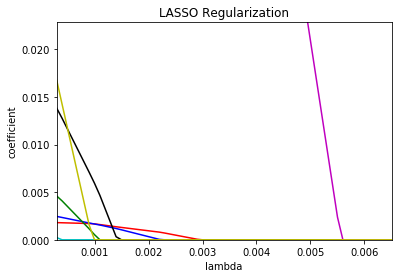

In [10]:
arr = np.array([])
print(arr.dtype)
arrfirst = np.array([])
arrsecond= np.array([])
arrthird = np.array([])
arrfourth = np.array([])
arrfifth = np.array([])
arrsixth = np.array([])
arrseventh = np.array([])
alpha_value_loop = 0.1
index = 0

while(alpha_value_loop<=1):
#     print(alpha_value_loop)
    # create a lasso regressor
    lasso = Lasso(alpha=alpha_value_loop, normalize=True)

    # Fit the regressor to the data
    lasso.fit(X,y)
    b = np.array([alpha_value_loop])
    c = np.array(lasso.coef_)
    arr = np.concatenate((arr, b), axis=0)
    
    print(arrfirst.shape, np.array([lasso.coef_[0]]))
    arrfirst = np.concatenate((arrfirst, np.array([lasso.coef_[0]])),axis=0)
    arrsecond = np.concatenate((arrsecond, np.array([lasso.coef_[1]])),axis=0)
    arrthird = np.concatenate((arrthird, np.array([lasso.coef_[2]])),axis=0)
    arrfourth = np.concatenate((arrfourth, np.array([lasso.coef_[3]])),axis=0)
    arrfifth = np.concatenate((arrfifth, np.array([lasso.coef_[4]])),axis=0)
    arrsixth = np.concatenate((arrsixth, np.array([lasso.coef_[5]])),axis=0)
    arrseventh = np.concatenate((arrseventh, np.array([lasso.coef_[6]])),axis=0)
    
    
    temp=0
    for j in lasso.coef_:
        if j>0:
            temp += 1
    if temp==7:
        print("FINISH   : ",alpha_value_loop, lasso.coef_)
        break
        
    alpha_value_loop -= 0.0001
    round(alpha_value_loop,5)
    if temp==0:
        index += 1


index -= 10
plt.title('LASSO Regularization')
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.plot(arr[index:], arrfirst[index:], 'r', arr[index:], arrsecond[index:], 'b', arr[index:], arrthird[index:], 'g', arr[index:], arrfourth[index:], 'c', arr[index:], arrfifth[index:], 'k', arr[index:], arrsixth[index:], 'm',arr[index:], arrseventh[index:], 'y')
plt.margins(0.00001)
plt.ylim(0,np.mean(lasso.coef_))
plt.show()


In [11]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "\nTEST:",test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

TRAIN: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344

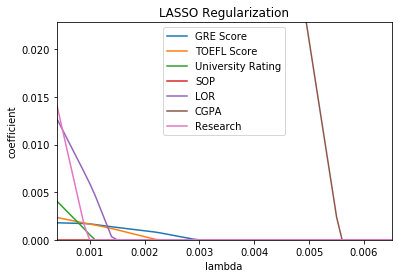

Maximum alpha where GRE Score is nonzero :  [0.0029]
Maximum alpha where TOEFL Score is nonzero :  [0.0022]
Maximum alpha where University Rating is nonzero :  [0.001]
Maximum alpha where SOP is nonzero :  [0.0003]
Maximum alpha where LOR is nonzero :  [0.0014]
Maximum alpha where CGPA is nonzero :  [0.0055]
Maximum alpha where Research is nonzero :  [0.0009]


In [21]:
lassoCoefArr = np.ndarray(shape=(df_train_drop.shape[1],9000), dtype=float)
lambdaArr = np.array([])
featureArr = np.ones((df_train_drop.shape[1],1))


lambdaIter = 0.1
firstNonZeroIndex = 0
lastIndex=0

while(lambdaIter<=1):
#     print(lambdaIter)
    # create a lasso regressor
    lasso = Lasso(alpha=lambdaIter, normalize=True)

    # Fit the regressor to the data
    lasso.fit(X,y)
    b = np.array([lambdaIter])
    c = np.array(lasso.coef_)
    lambdaArr = np.concatenate((lambdaArr, b), axis=0)
    
    
    for i in range(df_train_drop.shape[1]):
        lassoCoefArr[i][lastIndex]=lasso.coef_[i]
    
    numberOfNonZeroCoef=0
    for index in range(df_train_drop.shape[1]):
        if lasso.coef_[index]>0:
            numberOfNonZeroCoef +=1
            if featureArr[index] == 1:
                featureArr[index]=lambdaIter
    if numberOfNonZeroCoef==7:
        break
        
    lambdaIter -= 0.0001
    round(lambdaIter,5)
    if numberOfNonZeroCoef==0:
        firstNonZeroIndex += 1
    lastIndex +=1


firstNonZeroIndex -= 10
plt.title('LASSO Regularization')
plt.xlabel('lambda')
plt.ylabel('coefficient')
colors = ['tab:blue', 'tab:orange', 'tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','b', 'g', 'r', 'c', 'm', 'y', 'k']
for x in range(df_train_drop.shape[1]):
    plt.plot(lambdaArr[firstNonZeroIndex:lastIndex],lassoCoefArr[x][firstNonZeroIndex:lastIndex],colors[x], label=colnames[x])

plt.legend()
plt.margins(0.00001)
plt.ylim(0,np.mean(lasso.coef_))
plt.show()

for x in range(df_train_drop.shape[1]):
    print('Maximum alpha where',colnames[x],' coefficient is nonzero : ',featureArr[x])